In [2]:
# importing important libaries 

import pandas as pd
import numpy as np

# visualization library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# warning
import warnings
warnings.filterwarnings('ignore')

# Preprocessing and Normalization
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.model_selection import train_test_split, GridSearchCV


In [3]:
# getting the dataset
df=pd.read_excel(r'C:\Users\DELL\Documents\Flight_Price_dataset.xlsx')
df.head()
                 

,Unnamed: 0,AirLines,Source,Destination,Total_Stops,Departure_Time,Arrival_Time,Total_Duration,Date_Of_Journey,Flight_Price
0,0,Go First,New Delhi,Mumbai,Non Stop,15:45,17:55,2h 10m,"Wed, 21 Sep","5,950"
1,1,SpiceJet,New Delhi,Mumbai,Non Stop,19:00,21:10,2h 10m,"Wed, 21 Sep","5,950"
2,2,Go First,New Delhi,Mumbai,Non Stop,20:50,23:00,2h 10m,"Wed, 21 Sep","5,950"
3,3,Go First,New Delhi,Mumbai,Non Stop,18:20,20:35,2h 15m,"Wed, 21 Sep","5,950"
4,4,SpiceJet,New Delhi,Mumbai,Non Stop,19:45,22:00,2h 15m,"Wed, 21 Sep","5,950"


In [4]:
# dimension of dataset
df.shape

(2787, 10)

We can observe that our dataset has 10 columns and 2787 rows. Column Unnamed: 0 seems to be index column which we can drop. Let's see if we have any null values or any missing values.

In [5]:
# Checking for null values
df.isnull().sum()

Unnamed: 0          0
AirLines           75
Source              0
Destination         0
Total_Stops         0
Departure_Time      0
Arrival_Time        0
Total_Duration      0
Date_Of_Journey     0
Flight_Price        0
dtype: int64

We can see that we got some missing values here in airlines column, we can either impute them or we can drop that all togather, as this is very small number , so the data loss is not huge. Let's chcek for data types of all the columns. 

In [6]:
# Datatype of columns
df.dtypes

Unnamed: 0          int64
AirLines           object
Source             object
Destination        object
Total_Stops        object
Departure_Time     object
Arrival_Time       object
Total_Duration     object
Date_Of_Journey    object
Flight_Price       object
dtype: object

We can Onserve that our entire table is of categorical data type, we need to do some feature engineering, data cleaning to prepare data for visualization and encoding.


# Data Cleaning

In [7]:
# dropping column Unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace= True)

# checking the dimension again
df.shape

(2787, 9)

In [8]:
# Droping rows with missing values for airlines.
df.dropna(axis=0, inplace= True)
print(df.isnull().sum())
print(df.shape)



AirLines           0
Source             0
Destination        0
Total_Stops        0
Departure_Time     0
Arrival_Time       0
Total_Duration     0
Date_Of_Journey    0
Flight_Price       0
dtype: int64
(2712, 9)


Now our dataset looks good, we can move ahead with Dataset Description and Feature Engineering.

In [9]:
# Description of Categorical Columns
df.describe(include= [object])

,AirLines,Source,Destination,Total_Stops,Departure_Time,Arrival_Time,Total_Duration,Date_Of_Journey,Flight_Price
count,2712,2712,2712,2712,2712,2712,2712,2712,2712
unique,6,6,6,4,209,290,294,15,1091
top,Vistara,New Delhi,Kolkata,1 Stop,07:00,08:50\n+ 1 day,2h 10m,"Mon, 10 Oct","5,954"
freq,811,969,1166,1805,71,129,156,501,81


We can observe that Airlines , source and destinations has 6 unique values, Date_of_Journey consist of both day of journey and date, we need to separate them, so that we can reduce cardinality in it,also Departure_Time and Arrival_time shows 209 unique values, we need to separate them HOur and Minute basis so that we can reduce the cardinality.



# Feature Engineering and EDA

In [10]:
# checking the dataset one more time.
df.tail()

,AirLines,Source,Destination,Total_Stops,Departure_Time,Arrival_Time,Total_Duration,Date_Of_Journey,Flight_Price
2782,SpiceJet,New Delhi,Kolkata,1 Stop,06:30,18:10,11h 40m,"Tue, 11 Oct","20,969"
2783,SpiceJet,New Delhi,Kolkata,1 Stop,13:05,18:10,5h 05m,"Tue, 11 Oct","21,913"
2784,Air India,New Delhi,Kolkata,1 Stop,05:30,10:40\n+ 1 day,29h 10m,"Tue, 11 Oct","28,602"
2785,Air Asia,New Delhi,Kolkata,2 Stop(s),10:40,19:50,9h 10m,"Tue, 11 Oct","30,180"
2786,Air Asia,New Delhi,Kolkata,2 Stop(s),05:10,19:50,14h 40m,"Tue, 11 Oct","30,180"


In [11]:
# Let's reset the index so that pre processing other columns using loop will be feasible.
df.reset_index()

,index,AirLines,Source,Destination,Total_Stops,Departure_Time,Arrival_Time,Total_Duration,Date_Of_Journey,Flight_Price
0,0,Go First,New Delhi,Mumbai,Non Stop,15:45,17:55,2h 10m,"Wed, 21 Sep","5,950"
1,1,SpiceJet,New Delhi,Mumbai,Non Stop,19:00,21:10,2h 10m,"Wed, 21 Sep","5,950"
2,2,Go First,New Delhi,Mumbai,Non Stop,20:50,23:00,2h 10m,"Wed, 21 Sep","5,950"
3,3,Go First,New Delhi,Mumbai,Non Stop,18:20,20:35,2h 15m,"Wed, 21 Sep","5,950"
4,4,SpiceJet,New Delhi,Mumbai,Non Stop,19:45,22:00,2h 15m,"Wed, 21 Sep","5,950"
...,...,...,...,...,...,...,...,...,...,...
2707,2782,SpiceJet,New Delhi,Kolkata,1 Stop,06:30,18:10,11h 40m,"Tue, 11 Oct","20,969"
2708,2783,SpiceJet,New Delhi,Kolkata,1 Stop,13:05,18:10,5h 05m,"Tue, 11 Oct","21,913"
2709,2784,Air India,New Delhi,Kolkata,1 Stop,05:30,10:40\n+ 1 day,29h 10m,"Tue, 11 Oct","28,602"
2710,2785,Air Asia,New Delhi,Kolkata,2 Stop(s),10:40,19:50,9h 10m,"Tue, 11 Oct","30,180"


In [12]:
df.shape            #chcekig dimension

(2712, 9)

In [13]:
# Let's start with date of Journey
# we will extract 2 information from here, Day, Date and Month
# splitting date as to make Date_of_Journey a useful information
df['Day']= df['Date_Of_Journey'].apply(lambda x:x.split(',')[0])
df['Date_Month']=df['Date_Of_Journey'].apply(lambda x :x.split(',')[1])

# chceking column od dataframe
df.head(2)

,AirLines,Source,Destination,Total_Stops,Departure_Time,Arrival_Time,Total_Duration,Date_Of_Journey,Flight_Price,Day,Date_Month
0,Go First,New Delhi,Mumbai,Non Stop,15:45,17:55,2h 10m,"Wed, 21 Sep","5,950",Wed,21 Sep
1,SpiceJet,New Delhi,Mumbai,Non Stop,19:00,21:10,2h 10m,"Wed, 21 Sep","5,950",Wed,21 Sep


In [14]:
# Dropping Date_Of_journey
df.drop('Date_Of_Journey', axis=1, inplace= True)
df.shape

(2712, 10)

In [15]:
# Feature engineering for departure time.

df['Dep_hour']=df['Departure_Time'].apply(lambda x:x.split(':')[0])
df['Dep_min']=df['Departure_Time'].apply(lambda x:x.split(':')[1])

#coverting to int type
df['Dep_hour']=df['Dep_hour'].astype(int)
df['Dep_min']= df['Dep_min'].astype(int)

#dropping Arrival_Time
df.drop('Departure_Time', axis=1, inplace= True)



In [16]:
df.head(2)

,AirLines,Source,Destination,Total_Stops,Arrival_Time,Total_Duration,Flight_Price,Day,Date_Month,Dep_hour,Dep_min
0,Go First,New Delhi,Mumbai,Non Stop,17:55,2h 10m,"5,950",Wed,21 Sep,15,45
1,SpiceJet,New Delhi,Mumbai,Non Stop,21:10,2h 10m,"5,950",Wed,21 Sep,19,0


In [17]:
# Feature engineering for arrival time
df['Arrival_hour']=df['Arrival_Time'].apply(lambda x:x.split(':')[0])
df['Arrival_min']=df['Arrival_Time'].apply(lambda x:x.split(':')[1])

#coverting to int type
df['Arrival_hour']=df['Arrival_hour'].astype(int)


#dropping Arrival_Time
df.drop('Arrival_Time', axis=1, inplace= True)

# Chceking the dataframe
df.head(2)

,AirLines,Source,Destination,Total_Stops,Total_Duration,Flight_Price,Day,Date_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Go First,New Delhi,Mumbai,Non Stop,2h 10m,"5,950",Wed,21 Sep,15,45,17,55
1,SpiceJet,New Delhi,Mumbai,Non Stop,2h 10m,"5,950",Wed,21 Sep,19,0,21,10


In [18]:
# Total Stops feature engineering or mapping
df['Total_Stops'].value_counts()

1 Stop       1805
Non Stop      559
2 Stop(s)     326
3 Stop(s)      22
Name: Total_Stops, dtype: int64

In [19]:
# mapping the Total Stops column
df['Total_Stops']=df['Total_Stops'].map({'Non Stop': 0, '1 Stop': 1, '2 Stop(s)': 2, '3 Stop(s)': 3})
# Chceking dataframe
df.head(2)

,AirLines,Source,Destination,Total_Stops,Total_Duration,Flight_Price,Day,Date_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Go First,New Delhi,Mumbai,0,2h 10m,"5,950",Wed,21 Sep,15,45,17,55
1,SpiceJet,New Delhi,Mumbai,0,2h 10m,"5,950",Wed,21 Sep,19,0,21,10


In [20]:
# Feature Engineering on Total Duration

# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Total Duration column into list
duration = list(df["Total_Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

Duration_hours = []
Duration_mins = []
for i in range(len(duration)):
    Duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    Duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from data

In [21]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = Duration_hours
df["Duration_mins"] = Duration_mins

# Dropping Total Duration Column
df.drop('Total_Duration', axis=1, inplace= True)

In [22]:
df.head()       # chceking the dataframe

,AirLines,Source,Destination,Total_Stops,Flight_Price,Day,Date_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Go First,New Delhi,Mumbai,0,"5,950",Wed,21 Sep,15,45,17,55,2,10
1,SpiceJet,New Delhi,Mumbai,0,"5,950",Wed,21 Sep,19,0,21,10,2,10
2,Go First,New Delhi,Mumbai,0,"5,950",Wed,21 Sep,20,50,23,00,2,10
3,Go First,New Delhi,Mumbai,0,"5,950",Wed,21 Sep,18,20,20,35,2,15
4,SpiceJet,New Delhi,Mumbai,0,"5,950",Wed,21 Sep,19,45,22,00,2,15


In [23]:
# Price Column
df['Flight_Price'].dtype

dtype('O')

Since Flight Price is Object type , we need to convert it into numerical column.Without lossing any information.

In [24]:
df['Price']=df['Flight_Price'].apply(lambda x: x.replace(',',''))


In [25]:
#Converting into integer type
df['Price']=df['Price'].astype(int)

In [26]:
df.tail(3)

,AirLines,Source,Destination,Total_Stops,Flight_Price,Day,Date_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Price
2784,Air India,New Delhi,Kolkata,1,"28,602",Tue,11 Oct,5,30,10,40\n+ 1 day,29,10,28602
2785,Air Asia,New Delhi,Kolkata,2,"30,180",Tue,11 Oct,10,40,19,50,9,10,30180
2786,Air Asia,New Delhi,Kolkata,2,"30,180",Tue,11 Oct,5,10,19,50,14,40,30180


In [27]:
# Let's drop Flight Price column
df.drop('Flight_Price', axis=1, inplace= True)
df.shape

(2712, 13)

In [28]:
# Chceking datatype of each column
df.dtypes

AirLines          object
Source            object
Destination       object
Total_Stops        int64
Day               object
Date_Month        object
Dep_hour           int32
Dep_min            int32
Arrival_hour       int32
Arrival_min       object
Duration_hours     int64
Duration_mins      int64
Price              int32
dtype: object

In [29]:
# Date_Month
df['Date']=df['Date_Month'].apply(lambda x: x.split(' ')[1])
df['Month']= df['Date_Month'].apply(lambda x: x.split(' ')[2])


# Checking dataframe
df.head(2)

,AirLines,Source,Destination,Total_Stops,Day,Date_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Price,Date,Month
0,Go First,New Delhi,Mumbai,0,Wed,21 Sep,15,45,17,55,2,10,5950,21,Sep
1,SpiceJet,New Delhi,Mumbai,0,Wed,21 Sep,19,0,21,10,2,10,5950,21,Sep


In [30]:
#Converting date to integer column
df['Date']= df['Date'].astype(int)


# Dropping date_month column
df.drop('Date_Month', axis=1, inplace=True)

# Checking dimension
df.shape

(2712, 14)

In [31]:
# For that value in Arrival_min column having +1day in it, We need to drop that +1 day from there.
# For that we made a list from that column and perform operation on that list
Arrival_Min =list(df['Arrival_min'])
for i in range(len(Arrival_Min)):
    if len(Arrival_Min[i].split('\n')) == 2:         # chceking for condition 
        Arrival_Min[i]= Arrival_Min[i].split('\n')[0]

Arrival_Min


['55',
 '10',
 '00',
 '35',
 '00',
 '55',
 '20',
 '05',
 '40',
 '25',
 '10',
 '40',
 '10',
 '15',
 '15',
 '35',
 '30',
 '40',
 '40',
 '30',
 '40',
 '05',
 '40',
 '15',
 '15',
 '00',
 '50',
 '10',
 '15',
 '40',
 '40',
 '35',
 '10',
 '30',
 '50',
 '50',
 '50',
 '00',
 '20',
 '00',
 '50',
 '25',
 '20',
 '10',
 '10',
 '15',
 '40',
 '10',
 '05',
 '25',
 '55',
 '05',
 '05',
 '40',
 '35',
 '45',
 '15',
 '15',
 '35',
 '35',
 '05',
 '00',
 '40',
 '30',
 '00',
 '30',
 '00',
 '40',
 '30',
 '50',
 '05',
 '15',
 '15',
 '40',
 '55',
 '15',
 '35',
 '35',
 '35',
 '50',
 '00',
 '30',
 '15',
 '25',
 '00',
 '25',
 '25',
 '25',
 '15',
 '15',
 '15',
 '25',
 '15',
 '00',
 '40',
 '10',
 '15',
 '35',
 '35',
 '00',
 '15',
 '25',
 '20',
 '55',
 '50',
 '40',
 '10',
 '40',
 '20',
 '25',
 '00',
 '00',
 '05',
 '35',
 '10',
 '40',
 '10',
 '40',
 '55',
 '40',
 '35',
 '00',
 '20',
 '55',
 '35',
 '50',
 '10',
 '40',
 '20',
 '00',
 '20',
 '00',
 '05',
 '35',
 '10',
 '40',
 '15',
 '35',
 '15',
 '00',
 '35',
 '10',
 '30',

In [32]:
# Adding Arrival_Min list to df dataframe.
df['Arrival_Min']=Arrival_Min

df.tail()

,AirLines,Source,Destination,Total_Stops,Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Price,Date,Month,Arrival_Min
2782,SpiceJet,New Delhi,Kolkata,1,Tue,6,30,18,10,11,40,20969,11,Oct,10
2783,SpiceJet,New Delhi,Kolkata,1,Tue,13,5,18,10,5,5,21913,11,Oct,10
2784,Air India,New Delhi,Kolkata,1,Tue,5,30,10,40\n+ 1 day,29,10,28602,11,Oct,40
2785,Air Asia,New Delhi,Kolkata,2,Tue,10,40,19,50,9,10,30180,11,Oct,50
2786,Air Asia,New Delhi,Kolkata,2,Tue,5,10,19,50,14,40,30180,11,Oct,50


In [33]:
# Dropping Arrival_min as we don't want duplicate data.
df.drop('Arrival_min', axis=1, inplace= True)

# Converting Arrival_Min to integer type
df['Arrival_Min']= df['Arrival_Min'].astype(int)

# Printing datatype of each column
df.dtypes

AirLines          object
Source            object
Destination       object
Total_Stops        int64
Day               object
Dep_hour           int32
Dep_min            int32
Arrival_hour       int32
Duration_hours     int64
Duration_mins      int64
Price              int32
Date               int32
Month             object
Arrival_Min        int32
dtype: object

So far the data looks good, let's check on Month column. As we don't want to loose the authenticity of the data.


In [34]:
# Checking unique values in month column
df['Month'].value_counts()

Oct    2419
Sep     293
Name: Month, dtype: int64

It seems like we got most of the data from October and some from september. Let's map them to their respective calender Month interger September with 9 and October with 10.

In [35]:
# Mapping Month Column
df['Month']= df['Month'].map({'Sep': 9, 'Oct': 10})
df.head(2)

,AirLines,Source,Destination,Total_Stops,Day,Dep_hour,Dep_min,Arrival_hour,Duration_hours,Duration_mins,Price,Date,Month,Arrival_Min
0,Go First,New Delhi,Mumbai,0,Wed,15,45,17,2,10,5950,21,9,55
1,SpiceJet,New Delhi,Mumbai,0,Wed,19,0,21,2,10,5950,21,9,10


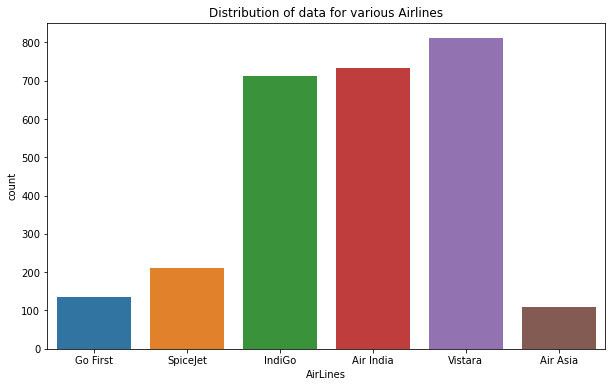

In [36]:
# Let's do some Visualization
# Univariate Analysis.
plt.figure(figsize=(10,6))
sns.countplot(df['AirLines'])
plt.title("Distribution of data for various Airlines")
plt.show()

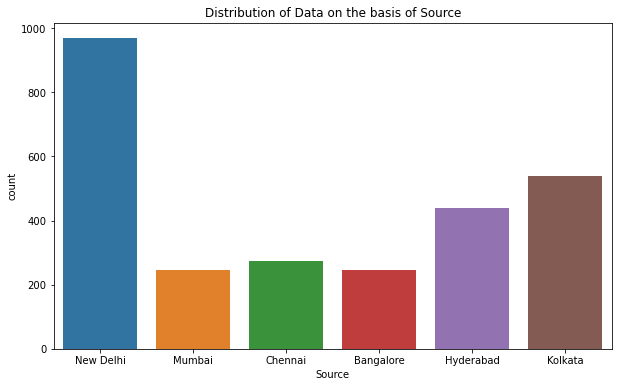

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(df['Source'])
plt.title("Distribution of Data on the basis of Source")
plt.show()

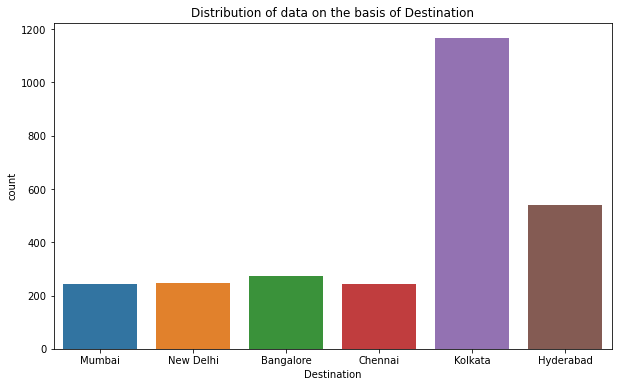

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df['Destination'])
plt.title("Distribution of data on the basis of Destination")
plt.show()

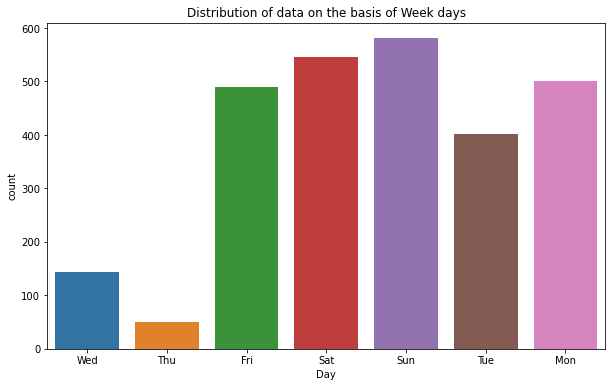

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(df['Day'])
plt.title("Distribution of data on the basis of Week days")
plt.show()

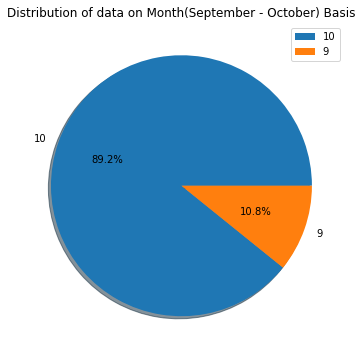

In [40]:
plt.figure(figsize=(10,6))
plt.pie(df['Month'].value_counts(),labels=df['Month'].value_counts().index, shadow= True, autopct='%1.1f%%')
plt.title("Distribution of data on Month(September - October) Basis")
plt.legend()
plt.show()

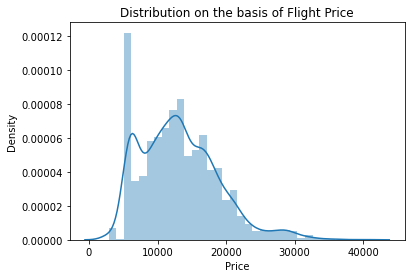

In [41]:
# Distribution of Price column
sns.distplot(df['Price'])
plt.title('Distribution on the basis of Flight Price')
plt.show()

We can observe that the Price of Flight Ticket varies from somewhere 5000 to 30000. For our dataset, most of the flight tickets are on an average 5-7K.

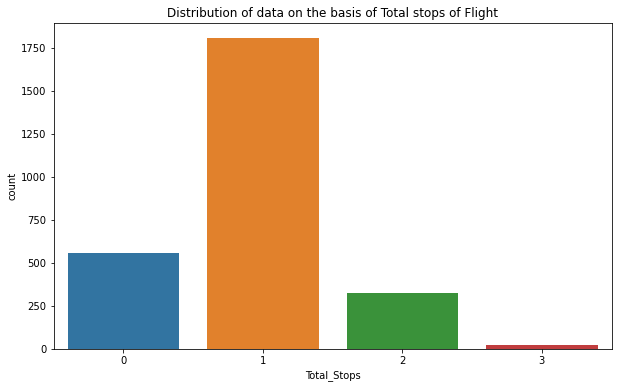

In [42]:
# Distribution of data on the basis of total stops
plt.figure(figsize=(10,6))
sns.countplot(df['Total_Stops'])
plt.title("Distribution of data on the basis of Total stops of Flight")
plt.show()

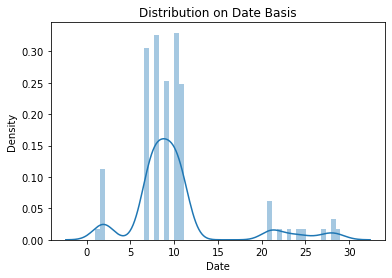

In [43]:
# Distribution of data on the basis of date
sns.distplot(df['Date'])
plt.title("Distribution on Date Basis")
plt.show()

Most of the data avaiable are either from starting dates or month end dates, We don't have data from middle of the month.

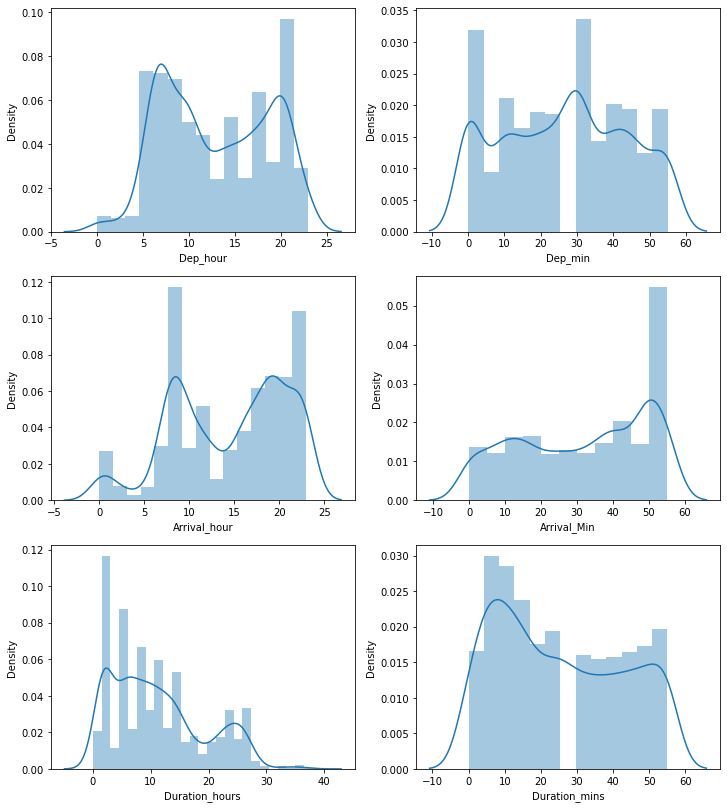

In [44]:
# Distribution for Dep_hour, Dep_min, Arrival_Hours, Arrival_Min, Duration_Hours, Duration_mins.
time_data=['Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_Min', 'Duration_hours', 'Duration_mins']
plt.figure(figsize=(12,14), facecolor='white')
plotnumber=1
for column in df[time_data]:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
    plotnumber+=1
plt.show()

We can observe the data distribution on the basis of Depature time, arrival time and total duration. The hours here are in 24 hrs presentaion while mins are represented in 60 mins form. And we can see that data is distributed accordingly.

Departure time basically denotes the time at which flight takes off. While Arrival Time denotes the landing time of Flight.
Total duration/Durations denotes the total flight time from source to destination. It includes hault/ layovers also.

# Multivariate analysis

Text(0.5, 1.0, 'Flight Prices as per Source and Destination')

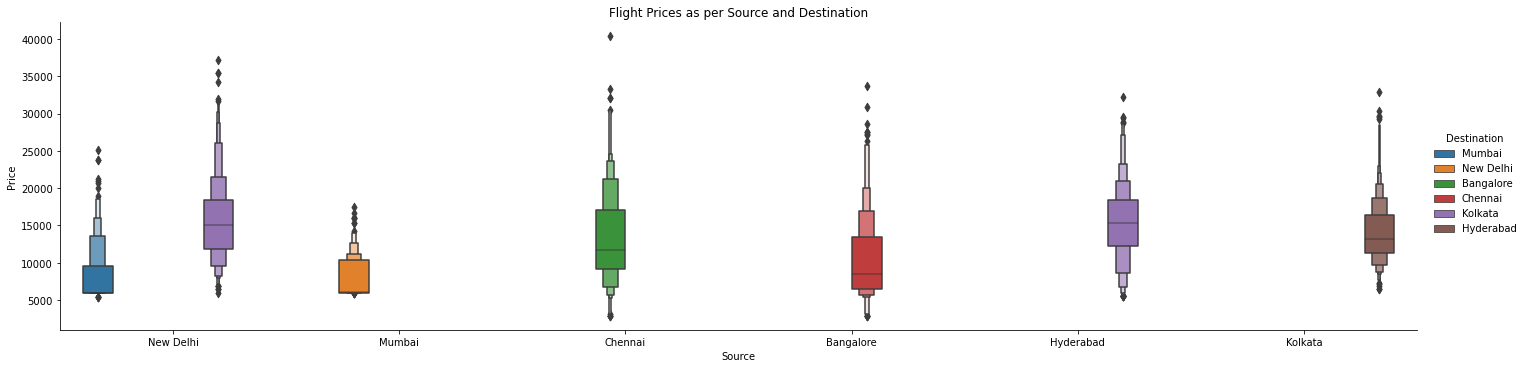

In [45]:
# Let's see how Price is related to source and destination.
sns.catplot(x='Source', y='Price', data=df, hue='Destination', kind='boxen', height=5, aspect=4)
plt.title("Flight Prices as per Source and Destination")

We can observe that the average price for Kolkata flights are highers. while Delhi-Mumbai flights are comparatively cheap.

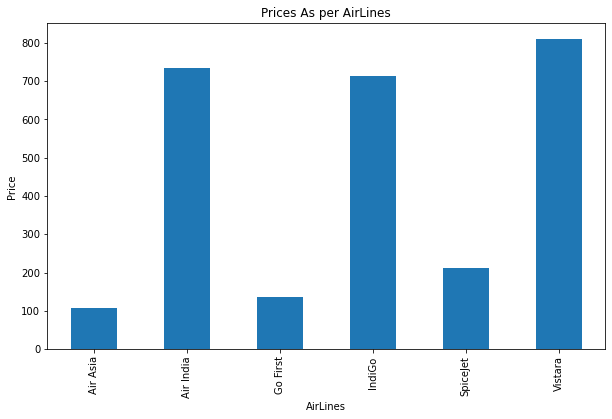

In [46]:
plt.figure(figsize=(10,6))
df.groupby('AirLines').Price.count().plot.bar(ylim=0)
plt.ylabel('Price')
plt.title("Prices As per AirLines")
plt.show()

We can see that the Flight ticket Prices for Vistara airlines are higher as compared to others. While Air Asia seems to be the most economical AirLines among the remaining.

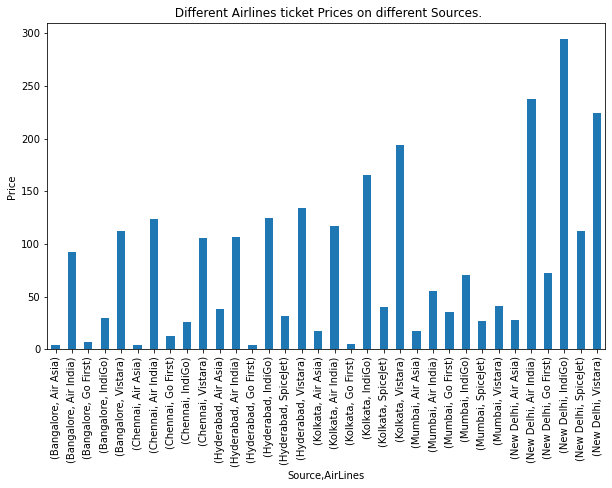

In [47]:
plt.figure(figsize=(10,6))
df.groupby(['Source','AirLines']).Price.count().plot.bar(ylim=0)
plt.ylabel('Price')
plt.title(" Different Airlines ticket Prices on different Sources.")
plt.show()

We can observe that New Delhi, Indigo has the highest Price Point while Chennai, AirAsia and Banglore AirAsia has lowest Price point. Also we can observe that economical flight tickets are availabe for Air Asia, Go first while Indigo, Vistara, Aior India are comparatively costlier. 

Text(0.5, 1.0, 'Price on the basis of Stops')

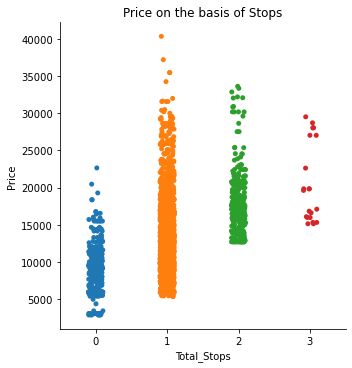

In [48]:
sns.catplot('Total_Stops','Price',data=df)
plt.title("Price on the basis of Stops")

We can Observe that direct flights are compoaratively cheaper than 1 stop or more stops flights. If the highest price for Non stop flight is around 23000, than we can say the hightest price for stop flight is around 36-37K.

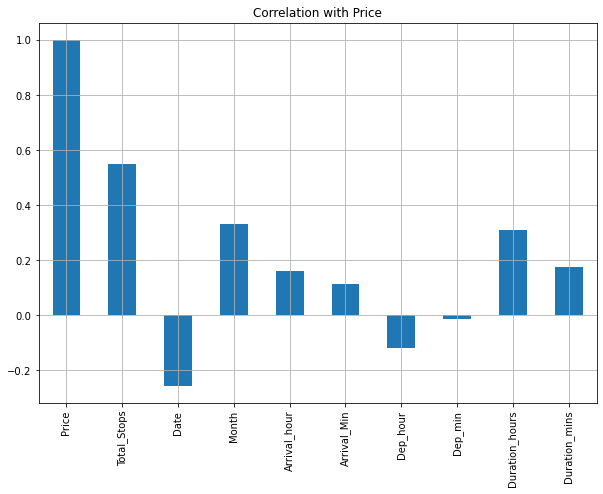

In [49]:
# Correlation Plot for numerical data
num_data=['Price','Total_Stops','Date','Month','Arrival_hour',
          'Arrival_Min','Dep_hour','Dep_min','Duration_hours','Duration_mins']
df[num_data].corrwith(df.Price).plot(kind='bar', grid= True, figsize=(10,7),
                                                  title="Correlation with Price")

plt.show()

We can observe that Date, Dep_hour and Depmin are inversely related to the flight Price.While Total_stops, Month, Arrival_hour, arrival_Min, Duration_Hours and Duration mins are positively correlated with flight Price.
Inverse correlation means when value of one increases the value for other decreases and vice versa. While positive correlation means if one increases the other is also increases.

Here we can see, that Price of Flight Ticket is highly correlated with Total Stops, while least correlated with Dep_min.


Let's visualize the Decriptive or Statistical Analysis of our dataset.

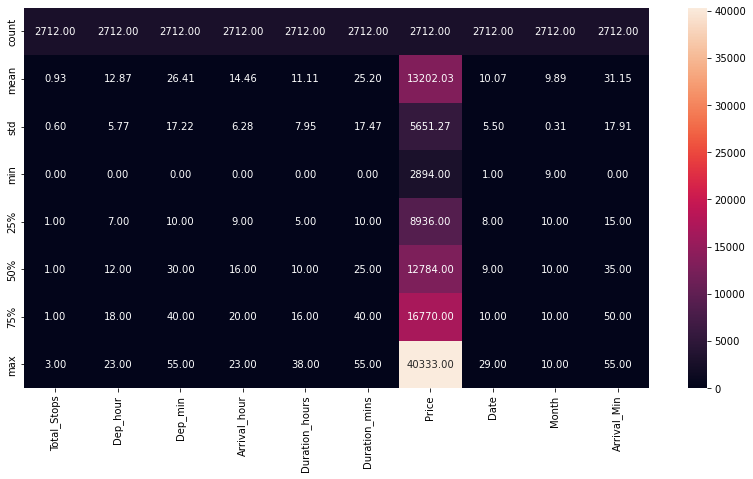

In [50]:
# Visualizing statistical description of dataset using Heatmap.
plt.figure(figsize=(14,7))
sns.heatmap(df.describe(), annot= True, fmt='.2f')
plt.show()

We can observe that, Price is our label or target variale. We have 2712 rows of data for all the features present in the dataset. Our dataset looks decent, with highest number of 3 total stops, all hourly details are in 23:00 terms and minutely deayils has max of 55 seems logical. In my opinion we can move ahead with this dataset.

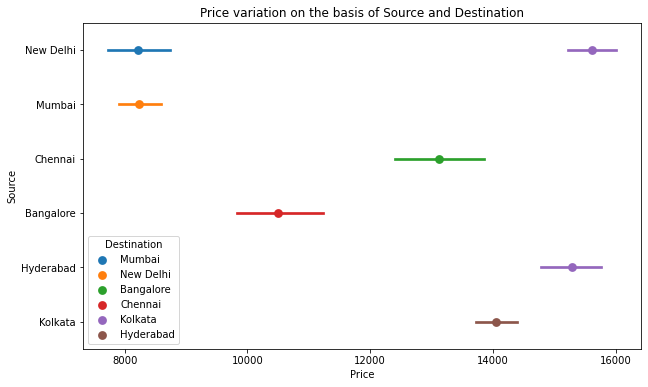

In [51]:
plt.figure(figsize=(10,6))
sns.pointplot(y='Source', x='Price', hue= 'Destination', data=df)
plt.title("Price variation on the basis of Source and Destination")
plt.show()

We can see that comparatively Delhi to kolkatta, Hyderabad-Kolkatta flights are more expensive in general. While Mumbai delhi, Delhi Mumbai flights are comparatively cheaper. In this plot, the x axis denotes the price, while y axis denotes Source, And colorful points in the plot denotes the destination source and price relationship.

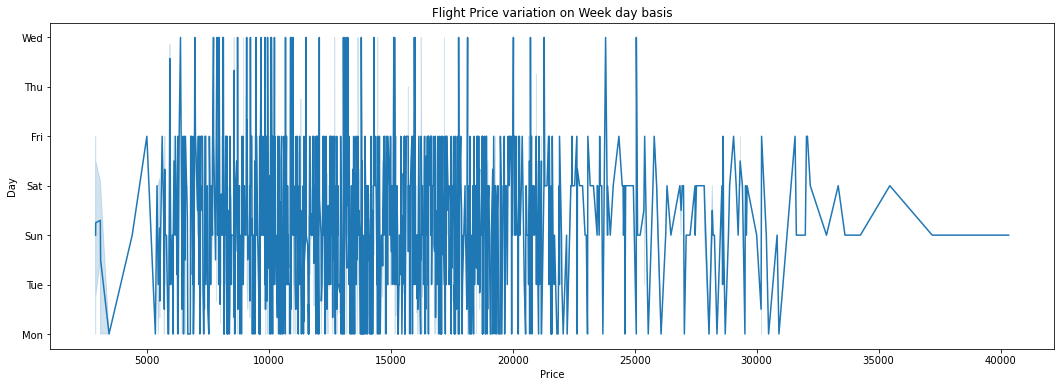

In [52]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Price', y='Day', data= df)
plt.title("Flight Price variation on Week day basis")
plt.show()

Although the weeks are not properly line up, we can clearly see that sunday's are expensive. We also observe that Friday, Saturday, Sunday and Monday are the days we have expensive tickets, while Tuesday, wednesday,Thrusday are comparatively cheaper tickets. 

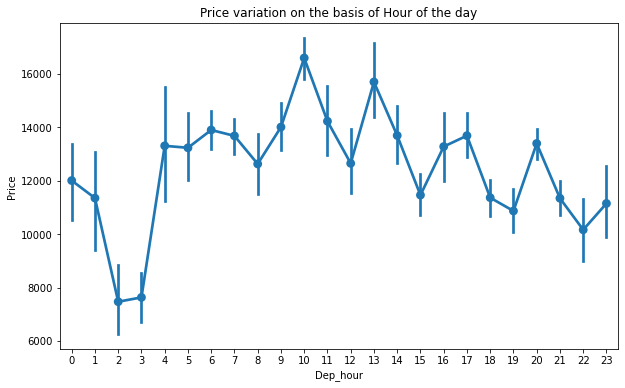

In [53]:
plt.figure(figsize=(10,6))
sns.pointplot(x= 'Dep_hour', y='Price', data=df)
plt.title("Price variation on the basis of Hour of the day")
plt.show()

On the basis of this we can observe that the Flight Price varies with the hour of the day, generally Morning flights are expensive compared to late nights or midnight flights.

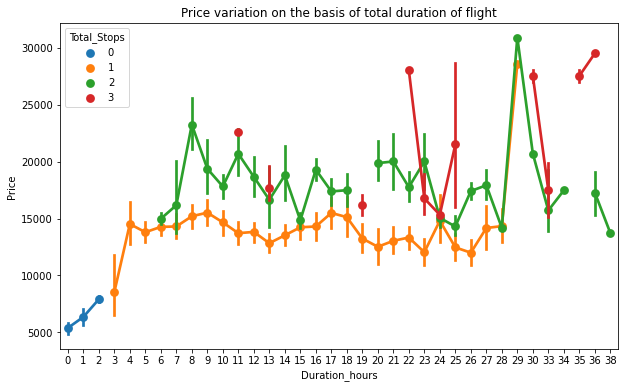

In [56]:
plt.figure(figsize=(10,6))
sns.pointplot(x='Duration_hours', y='Price', data=df,hue='Total_Stops')
plt.title("Price variation on the basis of total duration of flight")
plt.show()

From above observation we can say that Longer duration flights charge more money, i.e., the Flight ticket Prices are increases.
We also observe that the flights with more number of stops also cost more, if its longer duration flights.

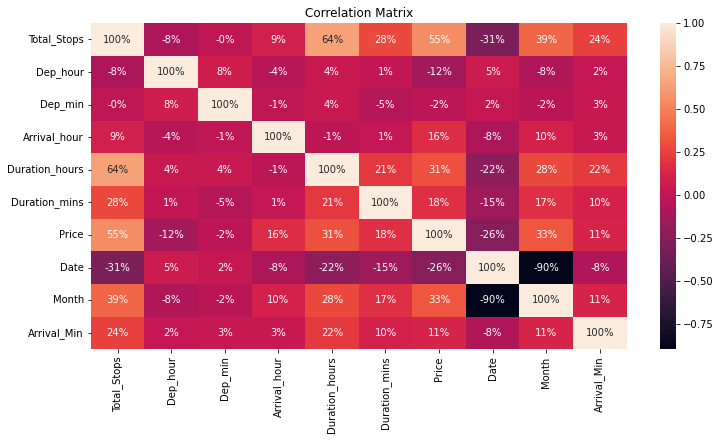

In [57]:
# Visualizing correlation matrix using HeatMap.
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.title("Correlation Matrix")
plt.show()

We can Observe that Total_stops is highly correlated Price, while Dep_min is least correlated with Price. This correlation Matrix only consist of numerical features. We need to encode the the categorical data before moving ahead.



# Encoding



In [58]:
df.dtypes

AirLines          object
Source            object
Destination       object
Total_Stops        int64
Day               object
Dep_hour           int32
Dep_min            int32
Arrival_hour       int32
Duration_hours     int64
Duration_mins      int64
Price              int32
Date               int32
Month              int64
Arrival_Min        int32
dtype: object

Since our categorical data  is nominal type mostly so we can encode  them using Label Encoder, we can also use One Hot encoder but, it will unnecassarily increase the columns numbers, and again the chance of Multicolinearity exist with it. So Label Encoder seems to be the better option to go with.

In [59]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()
df['AirLines']= lab_enc.fit_transform(df['AirLines'])
df['Source']= lab_enc.fit_transform(df['Source'])
df['Destination']= lab_enc.fit_transform(df['Destination'])


# we will do mapping for Day
df['Day'] = df['Day'].map({'Sun': 0, 'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu':4, 'Fri':5, 'Sat':6})


# checking the dataframe once
df.head()

,AirLines,Source,Destination,Total_Stops,Day,Dep_hour,Dep_min,Arrival_hour,Duration_hours,Duration_mins,Price,Date,Month,Arrival_Min
0,2,5,4,0,3,15,45,17,2,10,5950,21,9,55
1,4,5,4,0,3,19,0,21,2,10,5950,21,9,10
2,2,5,4,0,3,20,50,23,2,10,5950,21,9,0
3,2,5,4,0,3,18,20,20,2,15,5950,21,9,35
4,4,5,4,0,3,19,45,22,2,15,5950,21,9,0


We can observe that our dataset is now properly encoded, let's go ahead and see the correlation of the entire columns with respect to Price column which is our label.

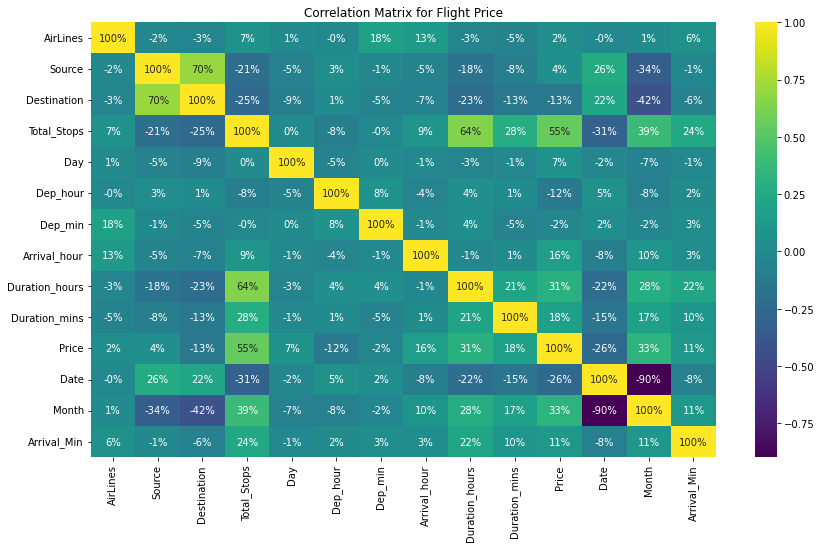

In [60]:
# Final correlaion matrix visualization using Heap map.
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot= True, fmt='.0%', cmap='viridis')
plt.title("Correlation Matrix for Flight Price")
plt.show()

We can observe that all the encoded categorical features are positively correlated with except Destination. Destination shows negative correlation with Price. Rest numerical data correlation seems to be same. We don't see any high degree of multicollinearity in our dataset,I think we are good to proceed. 




# Swekness & Outlier detection and removal.

In [61]:
df.skew()

AirLines         -0.116204
Source           -0.397813
Destination      -0.259430
Total_Stops       0.253357
Day               0.189164
Dep_hour          0.068617
Dep_min          -0.000847
Arrival_hour     -0.387218
Duration_hours    0.664917
Duration_mins     0.266247
Price             0.767952
Date              1.825144
Month            -2.526689
Arrival_Min      -0.257887
dtype: float64

We do skewness and outlier detection and removal mostly on continuous variable. Here taking a threshold of +/-0.5, we can observe that all the continuous feature are well within the threshold limit, means we don't see any major skewness in our data set. 

We do not perform skewness removal technique on categorical features and Label. So Price, Date, Month are not taken into consideration.

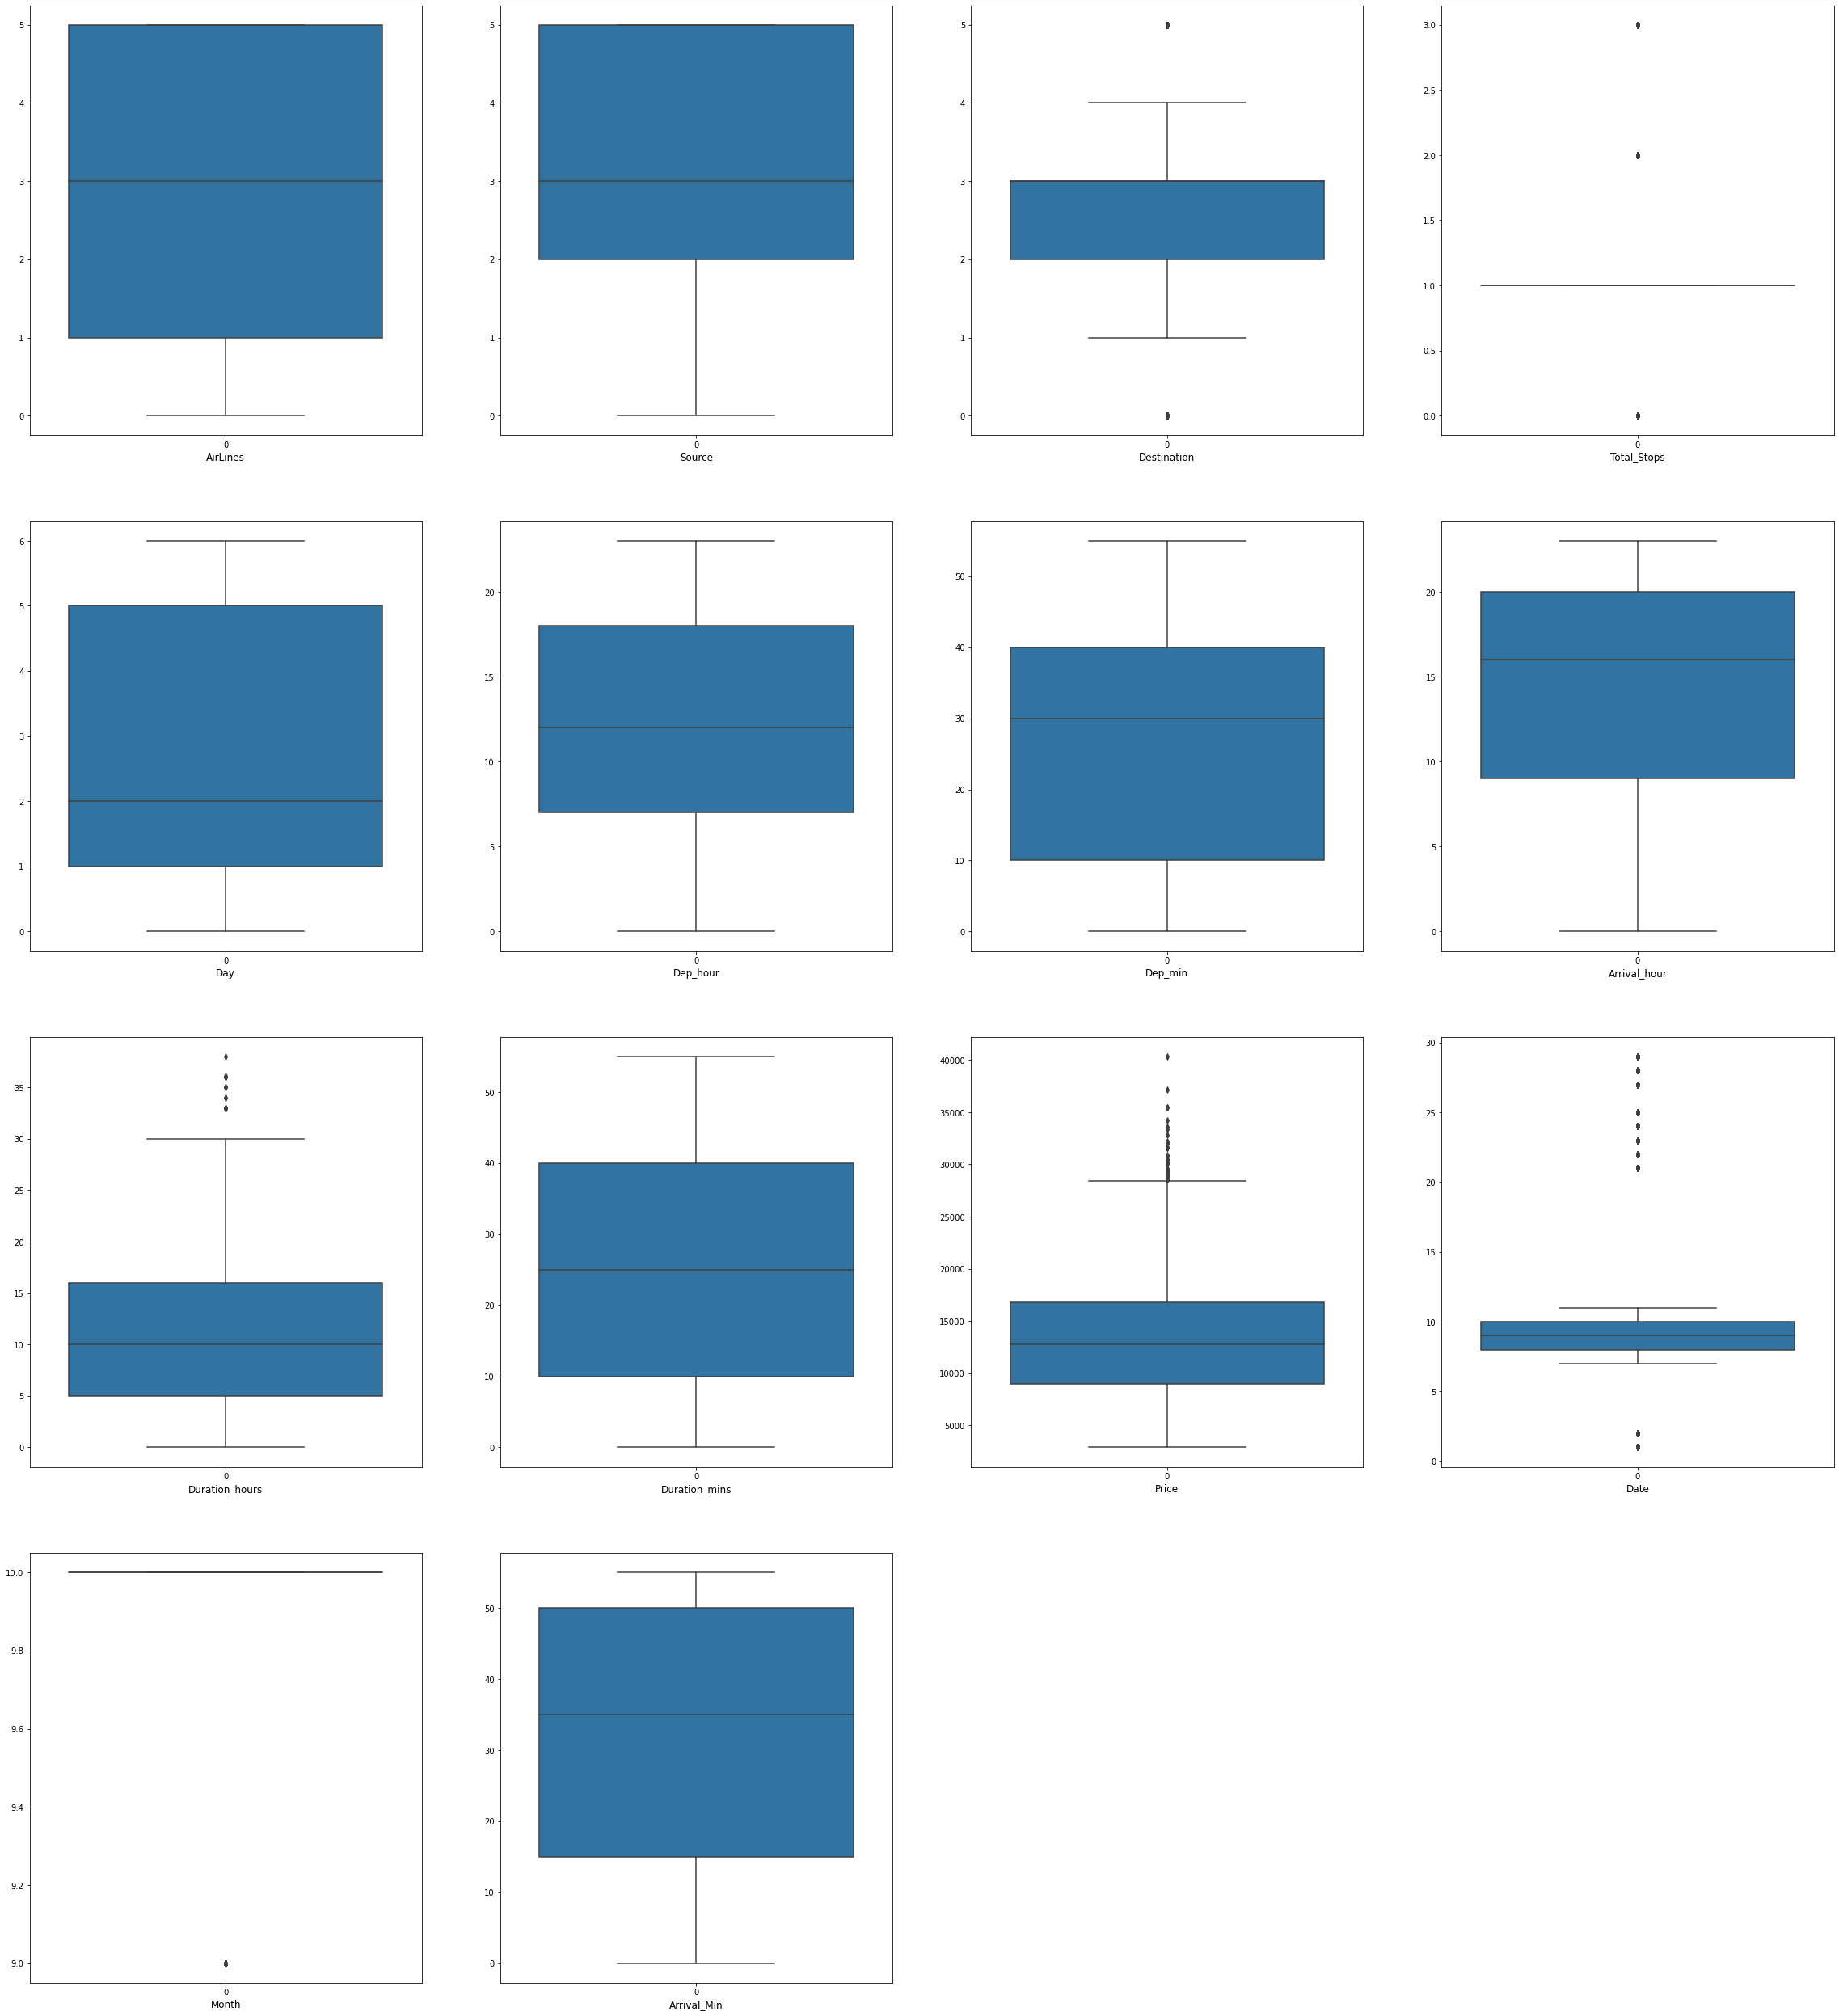

In [62]:
# Visualization of ouliers by using Box plot.
plt.figure(figsize=(40,45))
graph=1
for column in df:
    if graph<=14:      #14 denotes total number of columns
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=12)
    graph+=1
plt.show()

We can observe that there is no outliers in the continuous features, which means our data is safe to proceed ahead.



# Scaling

In [63]:
# We will scale the dataset using Standard Scaler
scalar= StandardScaler()


# Separating Features and Label.
X= df.drop('Price', axis=1)
y=df.Price

# Scaling the features X using Standard Scalar
X_scaled= scalar.fit_transform(X)

As our features data is scaled, we can move ahead with Model Building approach.


# Model Building

In [64]:
# Let's start by spliting our data into train and test dataset. For that we will use train_test_split method

X_train,X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.25, random_state=42)

Since our Label data is continuous in nature, we can say that its a Regression Problem. So we need to Build a Regression model to Predict the Price of Flight Ticket.

In [65]:
# Impoting metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Metrics are the evaluation parameter on the basis of which we determine which model is best suitable for our dataset. They are common parameter for all the regression algorithms we will perform going ahead.

Let's starts with Linear Regression.

# Linear regression

In [66]:
from sklearn.linear_model import LinearRegression

# ML Model
LR= LinearRegression()

#fit
LR.fit(X_train,y_train)

#predict
y_pred= LR.predict(X_test)
pred=LR.predict(X_train)

print("--------- Train score---------")
LR_train_MAE= round(mean_absolute_error(y_train, pred), 2)
LR_train_avg_MAE= LR_train_MAE/(max(y)-min(y))
LR_train_R2 = round(r2_score(y_train, pred), 4)
LR_train_RMSE=(np.sqrt(mean_squared_error(y_train, pred))/(max(y)-min(y)))         

print(f" R^2 Score : {LR_train_R2}\n")
print(f" MAE score avg : {LR_train_avg_MAE}\n")
print(f" RMSE score avg : {LR_train_RMSE}\n")
                    

#score variables
LR_R2= round(r2_score(y_test, y_pred), 4);
LR_MAE=(mean_absolute_error(y_test, y_pred)/(max(y)-min(y)))
LR_RMSE=(np.sqrt(mean_absolute_error(y_test,y_pred)))/(max(y)-min(y))  
                  

print("---------------Test Score-------------")
print(f" R^2 Score : {LR_R2}\n")
print(f" MAE score avg : {LR_MAE}\n")
print(f" RMSE score avg : {LR_RMSE}\n")
                    

--------- Train score---------
 R^2 Score : 0.3904

 MAE score avg : 0.08701728144448304

 RMSE score avg : 0.11850887758234199

---------------Test Score-------------
 R^2 Score : 0.4106

 MAE score avg : 0.08357207820313767

 RMSE score avg : 0.0014940615213816573



In [67]:
# cross validation
from sklearn.model_selection import cross_val_score
LR= LinearRegression()
scores= cross_val_score(LR, X_train, y_train, scoring='r2', cv=10)
LR_CS=scores.mean()
print("Cross validation score is : ", LR_CS)

Cross validation score is :  0.37619332688796214


Although the mean absolute error and RMSE scores are less, but r2 score is also not very promising. Let's try some ensemble technique.



# Ensemble Technique

In [68]:
from sklearn.ensemble import RandomForestRegressor

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)
#Model
RFR=RandomForestRegressor()

#fit 
RFR.fit(X_train,y_train)

#predict
y_pred= RFR.predict(X_test)
pred=RFR.predict(X_train)

print("--------- Train score---------")
RFR_train_R2= round(r2_score(y_train, pred), 4)
RFR_train_MAE=(mean_absolute_error(y_train,pred))/(max(y)-min(y))
RFR_train_RMSE=(np.sqrt(mean_squared_error(y_train,pred)))/(max(y)-min(y))

print(f" R^2 Score : {RFR_train_R2}\n")
print(f" MAE avg score : {RFR_train_MAE}\n")
print(f" RMSE avg score : {RFR_train_RMSE}\n")

#score variables
RFR_R2= round(r2_score(y_test, y_pred), 4)
RFR_MAE=(mean_absolute_error(y_test,y_pred))/(max(y)-min(y))
RFR_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))
print("---------------Test Score-------------")
print(f" R^2 Score : {RFR_R2}\n")
print(f" MAE avg score : {RFR_MAE}\n")
print(f" RMSE avg score : {RFR_RMSE}\n")


--------- Train score---------
 R^2 Score : 0.9625

 MAE avg score : 0.018804692749612172

 RMSE avg score : 0.02924722040952991

---------------Test Score-------------
 R^2 Score : 0.7512

 MAE avg score : 0.0469455134750493

 RMSE avg score : 0.07487756025933791



In [69]:
# cross validation
RFR= RandomForestRegressor()
scores= cross_val_score(RFR, X_train, y_train, scoring='r2', cv=10)
RFR_CS=scores.mean()
print("Cross validation score is : ", RFR_CS)

Cross validation score is :  0.712839042305409


In [73]:
# Hyper Parameter Tunning
# Create the random grid
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_grid = {'n_estimators': range(100,1200,100),
               'max_features':['auto', 'sqrt'] ,
               'max_depth': range(5,30,5),
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf':[1, 2, 5, 10] }

#grid_search=GridSearchCV(estimator=RFR, param_grid= random_grid, cv=5)

#grid_search.fit(X_train,y_train)

#grid_search.best_estimator_

rnd_srch=RandomizedSearchCV(RandomForestRegressor(), cv=5, param_distributions= random_grid)

rnd_srch.fit(X_train,y_train)

rnd_srch.best_estimator_

RandomForestRegressor(max_depth=20, max_features='auto', n_estimators=1100)

In [74]:
#prediction= grid_search.best_estimator_.predict(X_test) 

prediction=rnd_srch.best_estimator_.predict(X_test)
print("Post tuning scores")

#score variables
R2= round(r2_score(y_test, prediction), 4)
MAE=(mean_absolute_error(y_test,prediction))/(max(y)-min(y))
RMSE=(np.sqrt(mean_squared_error(y_test,prediction)))/(max(y)-min(y))
print("---------------Test Score-------------")
print(f" R^2 Score : {R2}\n")
print(f" MAE avg score : {MAE}\n")
print(f" RMSE avg score : {RMSE}\n")


Post tuning scores
---------------Test Score-------------
 R^2 Score : 0.7536

 MAE avg score : 0.04671061554139023

 RMSE avg score : 0.07451380714821466



We can observe that, Random Forest regressor works better that Linear regression. It's r2 score is better, even the error scores are closer to zero. 

# Lasso

In [75]:
from sklearn.linear_model import Lasso
#model
LS=Lasso(alpha=0.05)
#fit 
LS.fit(X_train,y_train)

#predict
y_pred= LS.predict(X_test)
pred=LS.predict(X_train)

print("--------- Train score---------")
LS_train_R2= round(r2_score(y_train, pred), 4)
LS_train_MAE=(mean_absolute_error(y_train,pred))/(max(y)-min(y))
LS_train_RMSE=(np.sqrt(mean_squared_error(y_train,pred)))/(max(y)-min(y))

print(f" R^2 Score : {LS_train_R2}\n")
print(f" MAE avg score : {LS_train_MAE}\n")
print(f" RMSE avg score : {LS_train_RMSE}\n")


#score variables
LS_MAE= (mean_absolute_error(y_test, y_pred))/(max(y)-min(y))   # we are calculating avg MAE
LS_R2= round(r2_score(y_test, y_pred), 4)
LS_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))
                         # calculating avg RMSE
print("\n-------------Test Score---------------\n")
print(f" R^2 Score : {LS_R2}\n")
print(f" Mean Absolute Error avg : {LS_MAE}\n")
print(f" Root Mean Squared Error avg: {LS_RMSE}\n")


--------- Train score---------
 R^2 Score : 0.3862

 MAE avg score : 0.08689110947787414

 RMSE avg score : 0.11838745144427126


-------------Test Score---------------

 R^2 Score : 0.4308

 Mean Absolute Error avg : 0.08417498851630803

 Root Mean Squared Error avg: 0.11324586607115743



In [76]:
# cross validation
LS= Lasso()
scores= cross_val_score(LS, X_train, y_train, scoring='r2', cv=10)
LS_CS=scores.mean()
print("Cross validation score is : ", LS_CS)

Cross validation score is :  0.369833387127369


In [77]:
# Hyper parameter tuning

param_grid= {'selection' : ['cyclic', 'random'],
             'max_iter': range(500,1200,100),
             'alpha': [0.01, 0.1, 0.5, 1.0],
             'random_state': range(0,100, 5)}


rnd_srch=RandomizedSearchCV(Lasso(), cv=5, param_distributions= param_grid)

rnd_srch.fit(X_train,y_train)

rnd_srch.best_estimator_


Lasso(max_iter=900, random_state=30, selection='random')

In [78]:
rnd_pred= rnd_srch.best_estimator_.predict(X_test)   # predicting with best para meters
print("Accuracy post tuning \n")
print(r2_score(y_test, rnd_pred))
print("\nPost tuning MAE\n")
print(mean_absolute_error(y_test,rnd_pred)/(max(y)-min(y)))

Accuracy post tuning 

0.43081233717995304

Post tuning MAE

0.08419560985769908


We can observe that even regularization model, did not help to increase the scores of linear model. So fae Ensemble technique works best for our dataset.

# Adaboost regressor

In [79]:
from sklearn.ensemble import AdaBoostRegressor

#  Model
ADA= AdaBoostRegressor()

#fit 
ADA.fit(X_train,y_train)

#predict 
y_pred=ADA.predict(X_test)
pred=ADA.predict(X_train)

print("--------- Train score---------")
ADA_train_R2= round(r2_score(y_train, pred), 4)
ADA_train_MAE=(mean_absolute_error(y_train,pred))/(max(y)-min(y))
ADA_train_RMSE=(np.sqrt(mean_squared_error(y_train,pred)))/(max(y)-min(y))

print(f" R^2 Score : {ADA_train_R2}\n")
print(f" MAE avg score : {ADA_train_MAE}\n")
print(f" RMSE avg score : {ADA_train_RMSE}\n")


#score variables
ADA_MAE= (mean_absolute_error(y_test, y_pred))/(max(y)-min(y))   # we are calculating avg MAE
ADA_R2= round(r2_score(y_test, y_pred), 4)
ADA_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))
                         # calculating avg RMSE
print("\n-------------Test Score---------------\n")
print(f" R^2 Score : {ADA_R2}\n")
print(f" Mean Absolute Error avg : {ADA_MAE}\n")
print(f" Root Mean Squared Error avg: {ADA_RMSE}\n")


--------- Train score---------
 R^2 Score : 0.3339

 MAE avg score : 0.10527349819336915

 RMSE avg score : 0.12333473506541323


-------------Test Score---------------

 R^2 Score : 0.3532

 Mean Absolute Error avg : 0.10225358565744243

 Root Mean Squared Error avg: 0.12072518838933205



In [80]:
# Cross validation
scores= cross_val_score(ADA, X_train, y_train, scoring='r2', cv=10)
ADA_CS=scores.mean()
print("Cross validation score is : ", ADA_CS)

Cross validation score is :  0.3414508063352847


In [81]:
# Hyper parameter Tuning using randomized search
from sklearn.model_selection import RandomizedSearchCV
ADA= AdaBoostRegressor()

parameter= {'n_estimators' : range(10,100,5),
            'learning_rate' : [0.1, 0.5, 1.0, 0.01],
            'loss' : ['linear', 'square', 'exponential'],
            'random_state' : range(2,100, 10)
           }

#grid_search=GridSearchCV(estimator=ADA, param_grid= parameter, cv=5)

#grid_search.fit(X_train,y_train)

#grid_search.best_estimator_        


rnd_srch=RandomizedSearchCV(AdaBoostRegressor(), cv=5, param_distributions= parameter)

rnd_srch.fit(X_train,y_train)

rnd_srch.best_estimator_


AdaBoostRegressor(n_estimators=10, random_state=92)

In [82]:
#GCV_pred= grid_search.best_estimator_.predict(X_test) 
rnd_pred= rnd_srch.best_estimator_.predict(X_test)   # predicting with best para meters
print("Post tuning scores")

#score variables
R2= round(r2_score(y_test, rnd_pred), 4)
MAE=(mean_absolute_error(y_test,rnd_pred))/(max(y)-min(y))
RMSE=(np.sqrt(mean_squared_error(y_test,rnd_pred)))/(max(y)-min(y))
print("---------------Test Score-------------")
print(f" R^2 Score : {R2}\n")
print(f" MAE avg score : {MAE}\n")
print(f" RMSE avg score : {RMSE}\n")


Post tuning scores
---------------Test Score-------------
 R^2 Score : 0.4702

 MAE avg score : 0.0834634368951084

 RMSE avg score : 0.10925654039192596



Although hyper parameter tuning increases the score but, is not as good as Random forest scores. So far Random Forest suits our dataset better. 

# XGBOOST Regressor

In [83]:
import xgboost as XGB
#model
XGB = XGB.XGBRegressor()

#fit
XGB.fit(X_train,y_train)

#predict 
y_pred=XGB.predict(X_test)
pred=XGB.predict(X_train)

print("--------- Train score---------")
XGB_train_R2= round(r2_score(y_train, pred), 4)
XGB_train_MAE=(mean_absolute_error(y_train,pred))/(max(y)-min(y))
XGB_train_RMSE=(np.sqrt(mean_squared_error(y_train,pred)))/(max(y)-min(y))

print(f" R^2 Score : {XGB_train_R2}\n")
print(f" MAE avg score : {XGB_train_MAE}\n")
print(f" RMSE avg score : {XGB_train_RMSE}\n")


#score variables
XGB_MAE= (mean_absolute_error(y_test, y_pred))/(max(y)-min(y))   # we are calculating avg MAE
XGB_R2= round(r2_score(y_test, y_pred), 4)
XGB_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))
                         # calculating avg RMSE
print("\n-------------Test Score---------------\n")
print(f" R^2 Score : {XGB_R2}\n")
print(f" Mean Absolute Error avg : {XGB_MAE}\n")
print(f" Root Mean Squared Error avg: {XGB_RMSE}\n")


--------- Train score---------
 R^2 Score : 0.9852

 MAE avg score : 0.012593469855886429

 RMSE avg score : 0.018385788140429106


-------------Test Score---------------

 R^2 Score : 0.8189

 Mean Absolute Error avg : 0.043010858706145155

 Root Mean Squared Error avg: 0.06387109966110599



In [84]:
# Cross Validation
scores= cross_val_score(XGB, X_train, y_train, scoring='r2', cv=10)
XGB_CS=scores.mean()
print("Cross validation score is : ", XGB_CS)

Cross validation score is :  0.7830885454831675


In [85]:
# Hyper parameter Tuning using GridSerachCV 

parameter= {'gamma':range(0,10,2),
           'max_depth': range(4,14,2),
           'feature_selector': ['cyclic','shuffle','random','greedy']}

grid_search=GridSearchCV(estimator=XGB, param_grid= parameter, cv=5)

grid_search.fit(X_train,y_train)

grid_search.best_estimator_


[14:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:40:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:40:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:40:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:40:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:40:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:40:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:40:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:40:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:40:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:41:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:41:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:41:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:42:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:42:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:42:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:43:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:43:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:43:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:43:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[14:43:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:43:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:43:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_selector='cyclic', gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [86]:
prediction= grid_search.best_estimator_.predict(X_test) 

print("Post tuning scores")

#score variables
R2= round(r2_score(y_test, prediction), 4)
MAE=(mean_absolute_error(y_test,prediction))/(max(y)-min(y))
RMSE=(np.sqrt(mean_squared_error(y_test,prediction)))/(max(y)-min(y))
print("---------------Test Score-------------")
print(f" R^2 Score : {R2}\n")
print(f" MAE avg score : {MAE}\n")
print(f" RMSE avg score : {RMSE}\n")

Post tuning scores
---------------Test Score-------------
 R^2 Score : 0.8182

 MAE avg score : 0.042028275076095085

 RMSE avg score : 0.06400931125769403



In [87]:
train_pred=grid_search.best_estimator_.predict(X_train)
print("Post Tuning score for train data")
r2_score(y_train,train_pred)

Post Tuning score for train data


0.9993976407090676

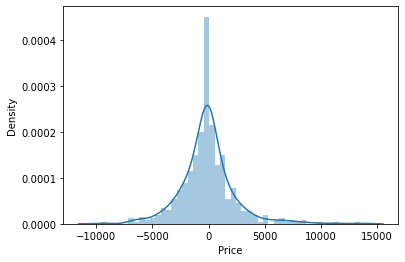

In [88]:
sns.distplot(y_test-prediction)
plt.show()

<AxesSubplot:xlabel='Price'>

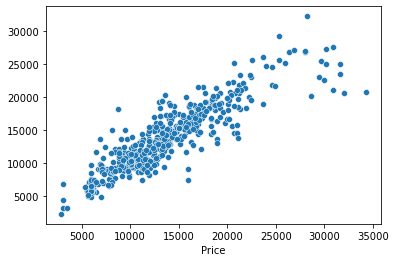

In [89]:
sns.scatterplot(y_test,prediction)

From above onservation we can observe that XGBoost regressor works better with our dataset. The r2 scores is closer to 1, the error scores are near to zero, The Visulaization graphs are also almost in same line, or we can say that shows good amount of collinearity. Let's summarize all the model before deciding the best.

# Summarizing each Model.

In [91]:
# Summarizing each model

MAE=[LR_MAE,RFR_MAE,LS_MAE,XGB_MAE,ADA_MAE]
R2= [LR_R2,RFR_R2,LS_R2,XGB_R2,ADA_R2]
RMSE=[LR_RMSE,RFR_RMSE,LS_RMSE,XGB_RMSE,ADA_RMSE]
Cross_score= [LR_CS,RFR_CS,LS_CS,XGB_CS,ADA_CS]

Model= pd.DataFrame({
    'Models':['Linear Regression', 'Random Forest Regressor', 'Lasso Regressor', 'XGBoost Regressor', 'AdaBoost Regressor'],
    'MAE': MAE, 'R^2' :R2,'RMSE': RMSE, 'Cross Validation Score': Cross_score })

Model.sort_values(by ='R^2', ascending = False )


,Models,MAE,R^2,RMSE,Cross Validation Score
3,XGBoost Regressor,0.043011,0.8189,0.063871,0.783089
1,Random Forest Regressor,0.046946,0.7512,0.074878,0.712839
2,Lasso Regressor,0.084175,0.4308,0.113246,0.369833
0,Linear Regression,0.083572,0.4106,0.001494,0.376193
4,AdaBoost Regressor,0.102254,0.3532,0.120725,0.341451


From above observation it is clear XGBoost Regressor is the best suitable model for our dataset out of the 5 model which we build. It gives both high value for r2 score and minimum value for mean absolute error and Root mean squared error.

As it is seen in all the model that we derive the average values for the MAE and RMSE, as it reprrsents the individual deviation from the result, but we want the error rate or avaerage error. And this value is suppositely near to zero, which is true in our case.

We also observe that AdaBoost inspite being a boosting technique, not performs very well with our dataset. Although RandomForest Regressor, gives good response for our Flight dataset, but in comparasion, XGBoost takes the credit.
We can go ahead and save our model.

# Saving the Best Model

In [116]:
# saving best performing model and saving the model to disk
import pickle
filename= "Flight_Price_Project.sav"
pickle.dump(XGB, open(filename, 'wb'))

We save our XGBoost Regressor Model for this dataset. We save it by using Pickle method, so that when somebody wants to use this model for prediction it will be easy to handle.